In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Walmart.csv')

In [3]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [5]:
df.shape

(6435, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
print('Null values: ',df.isnull().sum().sum())
print('Duplicate values: ', df.duplicated().sum())

Null values:  0
Duplicate values:  0


In [8]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [9]:
print('Stores: ',df['Store'].unique())
print('Holiday Flags: ',df['Holiday_Flag'].unique())

Stores:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Holiday Flags:  [0 1]


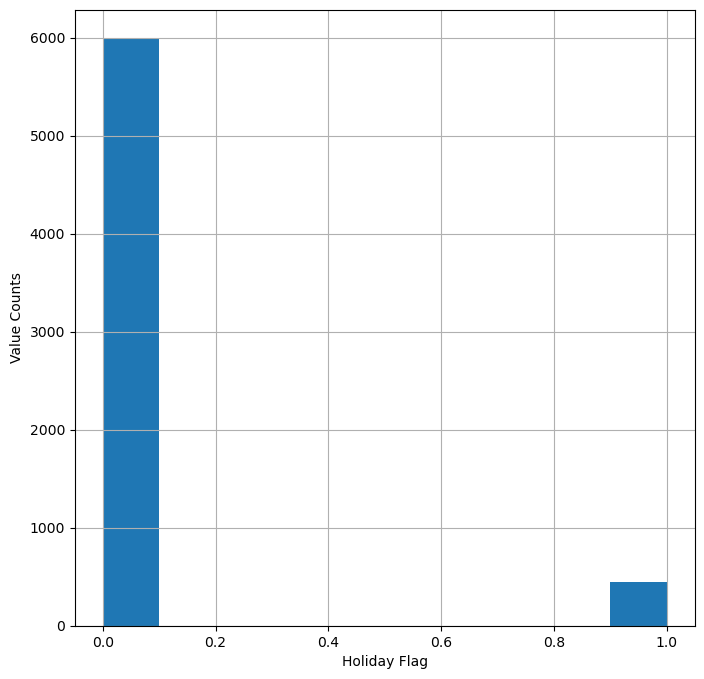

In [10]:
df['Holiday_Flag'].hist(figsize=(8,8))
plt.xlabel('Holiday Flag')
plt.ylabel('Value Counts')
plt.show()

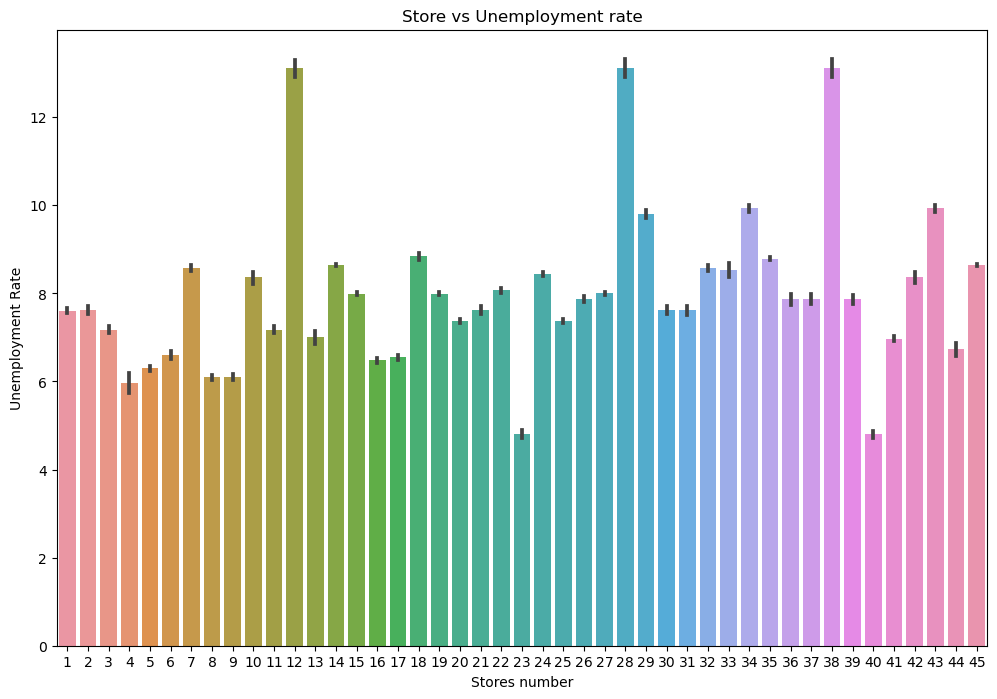

In [11]:
plt.figure(figsize=(12,8))
sns.barplot(x=df['Store'],y=df['Unemployment'],data=df)
plt.title('Store vs Unemployment rate')
plt.xlabel('Stores number')
plt.ylabel('Unemployment Rate')
plt.show()

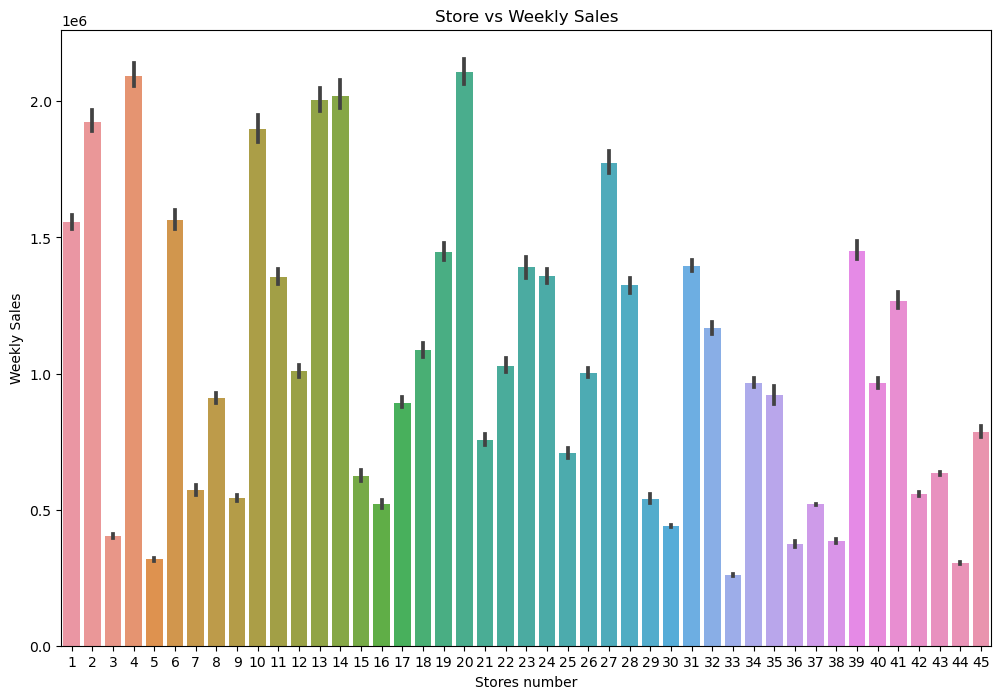

In [12]:
plt.figure(figsize=(12,8))
sns.barplot(x=df['Store'],y=df['Weekly_Sales'],data=df)
plt.title('Store vs Weekly Sales')
plt.xlabel('Stores number')
plt.ylabel('Weekly Sales')
plt.show()

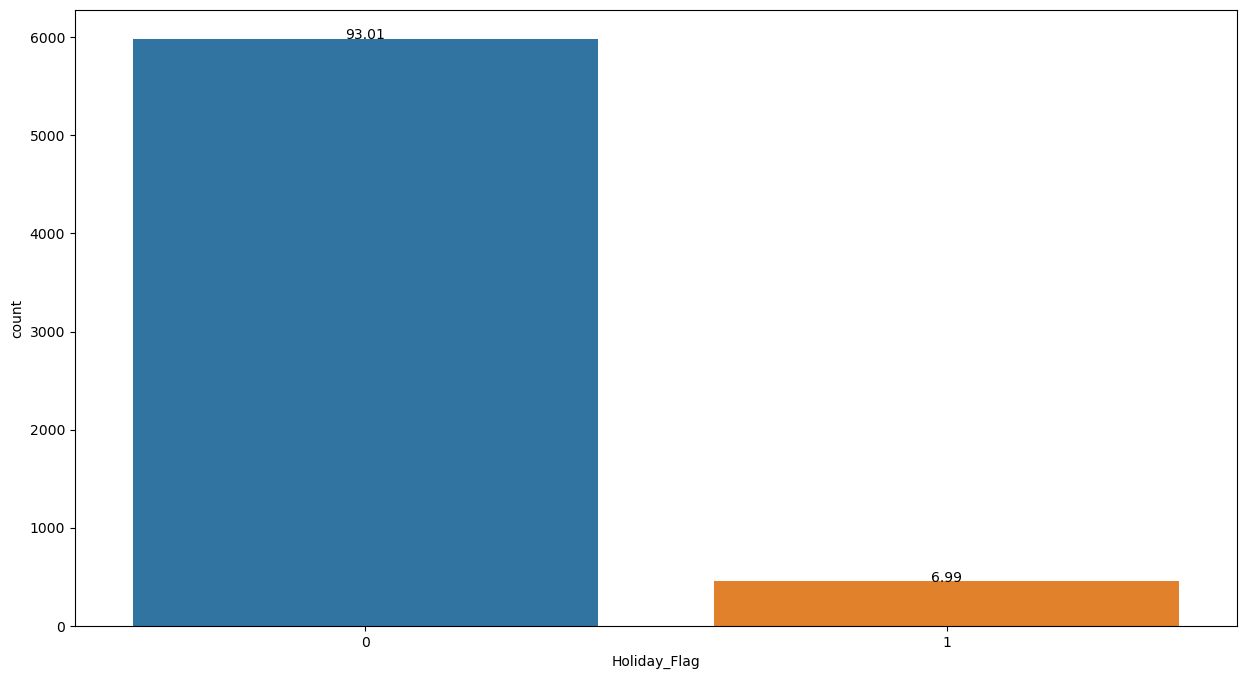

In [13]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="Holiday_Flag", data=df)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
plt.show()

In [14]:
df[['Holiday_Flag', 'Weekly_Sales']].groupby(['Holiday_Flag'], as_index=False).mean().sort_values(by='Weekly_Sales', ascending=False)

,Holiday_Flag,Weekly_Sales
1,1,1.122888e+06
0,0,1.041256e+06


In [15]:
from statsmodels.stats.weightstats import ztest

# Example: Comparing sales between two stores (Store 1 and Store 2)
store_1_sales = df[df['Store'] == 1]['Weekly_Sales']
store_2_sales = df[df['Store'] == 2]['Weekly_Sales']

# Perform Z-Test
z_stat, p_value = ztest(store_1_sales, store_2_sales)

print(f"Z-Statistic: {z_stat}")
print(f"P-Value: {p_value}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: The sales in the two stores are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in sales between the two stores.")


Z-Statistic: -15.583750600858258
P-Value: 9.388095623565946e-55
Reject the null hypothesis: The sales in the two stores are significantly different.


In [17]:
from scipy.stats import f_oneway

store_sales = [df[df['Store'] == store]['Weekly_Sales'] for store in df['Store'].unique()]

f_stat, p_value = f_oneway(*store_sales)
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")


F-Statistic: 1613.2994511315285, P-Value: 0.0


In [18]:
from scipy.stats import chi2_contingency

# Create a contingency table
sales_category = pd.cut(df['Weekly_Sales'], bins=[0, 20000, 40000, float('inf')], labels=['Low', 'Medium', 'High'])
contingency_table = pd.crosstab(df['Holiday_Flag'], sales_category)

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Squared: {chi2_stat}, P-Value: {p_value}")


Chi-Squared: 0.0, P-Value: 1.0


In [23]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract additional time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week


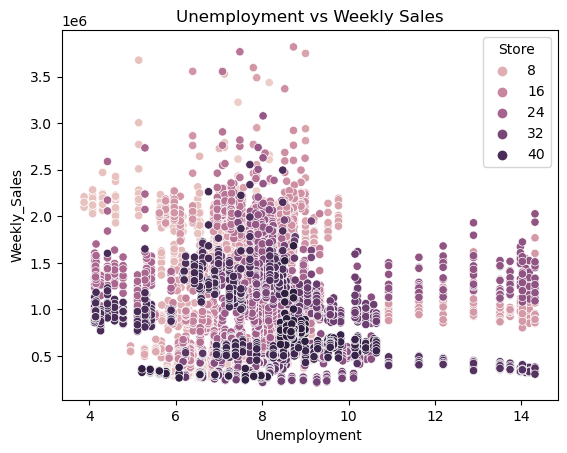

       Unemployment
Store              
1         -0.097955
2          0.066325
3         -0.230413
4         -0.337015
5         -0.207043
6          0.044251
7         -0.165382
8         -0.052580
9         -0.191534
10         0.131908
11        -0.020339
12        -0.009286
13        -0.171633
14         0.210786
15         0.078905
16        -0.070864
17        -0.263600
18         0.139179
19         0.101464
20        -0.095341
21         0.218367
22         0.039043
23        -0.077169
24        -0.012261
25        -0.004958
26        -0.066899
27        -0.014275
28         0.136671
29         0.084682
30         0.201862
31        -0.064738
32        -0.099455
33         0.101175
34         0.017010
35         0.483865
36         0.833734
37        -0.221287
38        -0.785290
39        -0.384681
40        -0.112528
41        -0.350630
42        -0.356355
43        -0.201954
44        -0.780076
45        -0.004041


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation between unemployment and weekly sales
sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales', hue='Store')
plt.title("Unemployment vs Weekly Sales")
plt.show()

# Calculate correlation
unemployment_corr = df.groupby('Store')[['Unemployment', 'Weekly_Sales']].corr().iloc[0::2, -1].unstack()
print(unemployment_corr)


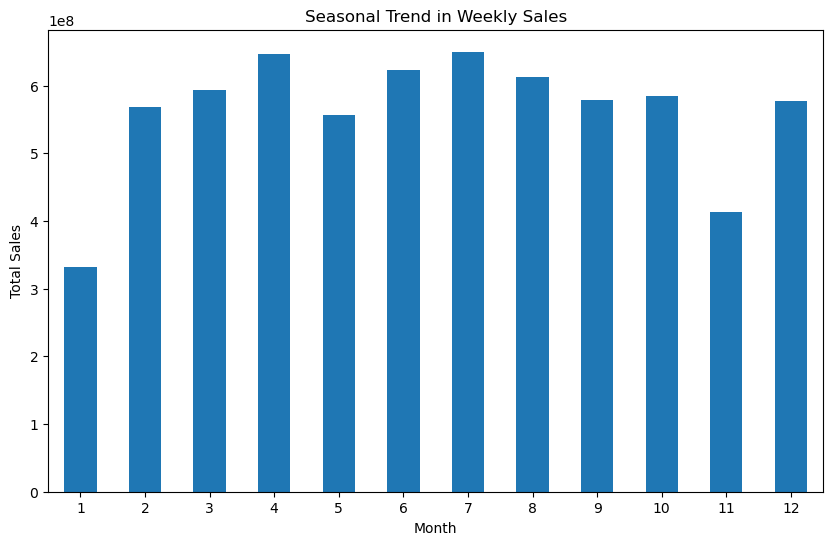

In [30]:
# Group sales by month
monthly_sales = df.groupby('Month')['Weekly_Sales'].sum()

# Plot sales trend
monthly_sales.plot(kind='bar', figsize=(10, 6))
plt.title("Seasonal Trend in Weekly Sales")
plt.xlabel("Month")
plt.xticks(rotation=360)
plt.ylabel("Total Sales")
plt.show()


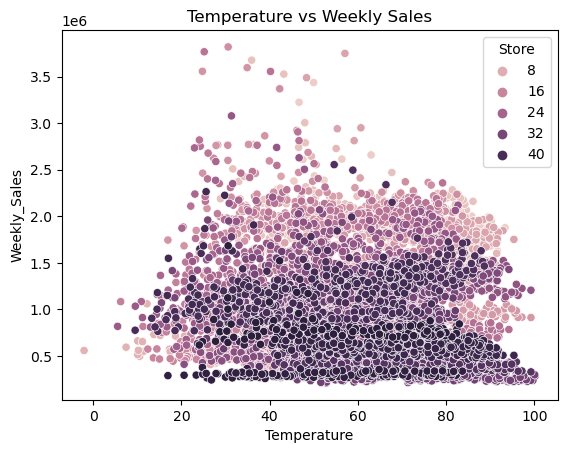

In [32]:
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', hue='Store')
plt.title("Temperature vs Weekly Sales")
plt.show()


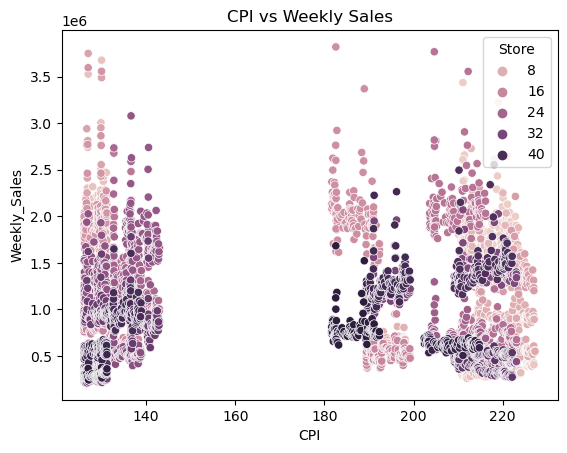

In [33]:
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales', hue='Store')
plt.title("CPI vs Weekly Sales")
plt.show()


In [35]:
# Calculate total sales per store
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)

# Top-performing stores
print("Top Performing Stores:\n", store_sales.head())

# Worst-performing store
print("Worst Performing Store:\n", store_sales.tail())

# Difference between highest and lowest
print("Sales Difference:", store_sales.max() - store_sales.min())


Top Performing Stores:
 Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64
Worst Performing Store:
 Store
38    55159626.42
36    53412214.97
5     45475688.90
44    43293087.84
33    37160221.96
Name: Weekly_Sales, dtype: float64
Sales Difference: 264237570.49999997


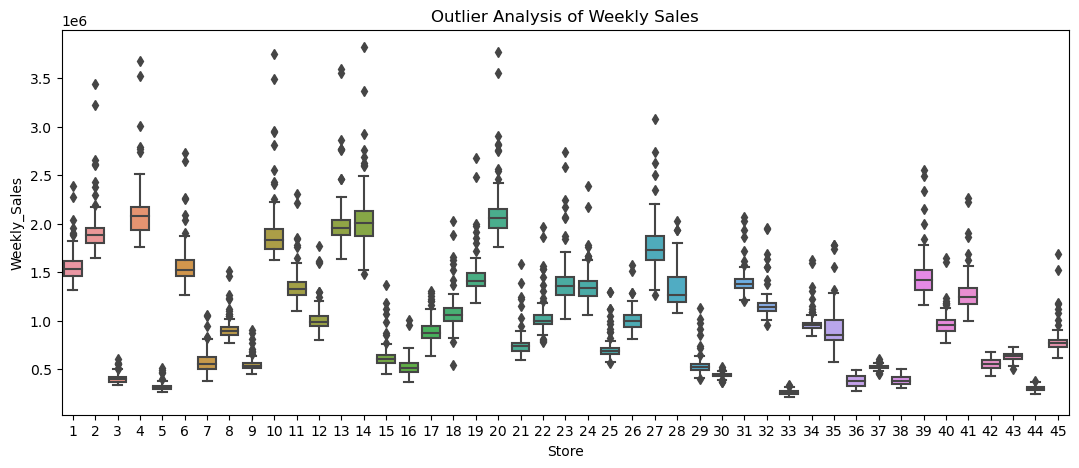

In [40]:
plt.figure(figsize=(13,5))
sns.boxplot(data=df, x='Store', y='Weekly_Sales')
plt.title("Outlier Analysis of Weekly Sales")
plt.show()


In [41]:
# Create a pivot table for time series data
time_series = df.pivot_table(values='Weekly_Sales', index='Date', columns='Store')

# Fill missing dates if necessary
time_series = time_series.asfreq('W').fillna(method='ffill')


In [42]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
train = time_series.iloc[:-12]
test = time_series.iloc[-12:]


In [43]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model for each store
predictions = {}
for store in time_series.columns:
    model = ARIMA(train[store], order=(5, 1, 0))  # ARIMA(p,d,q)
    model_fit = model.fit()
    predictions[store] = model_fit.forecast(steps=12)

# Convert predictions to a DataFrame
forecast = pd.DataFrame(predictions, index=test.index)
print(forecast)


C:\Users\shoum\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\shoum\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\shoum\anaconda3\Lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\shoum\anaconda3\Lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


LinAlgError: Schur decomposition solver error.

In [ ]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE for each store
mae_scores = {store: mean_absolute_error(test[store], forecast[store]) for store in test.columns}
print("MAE Scores:", mae_scores)


In [ ]:
# Plot forecast vs actual for one store
store_id = 1  # Change store ID as needed
plt.figure(figsize=(10, 6))
plt.plot(test[store_id], label='Actual Sales', marker='o')
plt.plot(forecast[store_id], label='Forecasted Sales', marker='x')
plt.title(f"Actual vs Forecasted Sales for Store {store_id}")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()


# Step 6: Report Insights
1. Create a detailed report summarizing:

1. Key trends and insights from the EDA.
1. Impact of unemployment, temperature, CPI on sales.
1. Seasonality in sales trends.
1. Forecast results and MAE scores.